In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('passwrod_data.csv', error_bad_lines=False)   #use error_bad_lines to counter parseError
df.head()

C:\Users\91727\anaconda3\envs\Python\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
df[df['password'].isnull()]

,password,strength
367579,NaN,0


In [4]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(669639, 2)

In [7]:
 df['strength'].unique()

array([1, 2, 0], dtype=int64)

C:\Users\91727\anaconda3\envs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='strength', ylabel='count'>

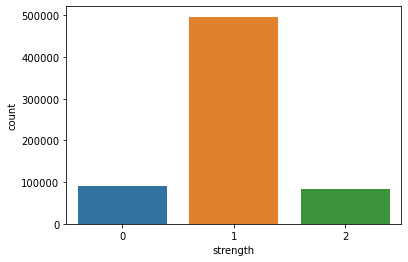

In [8]:
sns.countplot(df['strength'])

In [9]:
# since 1 has highest count it is an unbalanced dataset and if we make our ml model on this dataset it will be baised

In [10]:
# converting data into array
pswrd_tuple=np.array(df)
print(pswrd_tuple.shape)
pswrd_tuple
# we made this array so that we can easily fetch independent and dependent features from the data

(669639, 2)


array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [11]:
# before extracting dep or indep fetures we need to shuffle my data so that it can provide robustness to my model;
# so before passing it for training we must shuffle it to make it robust

In [12]:
# shuffling
import random
random.shuffle(pswrd_tuple)
print(pswrd_tuple.shape)
pswrd_tuple

(669639, 2)


array([['kzde5577', 1],
       ['kino3434', 1],
       ['kzde5577', 1],
       ...,
       ['MWpBmmTk2Mg185Ll', 2],
       ['xiycozf07', 1],
       ['kanan1996', 1]], dtype=object)

In [18]:
# getting all the independent data
x=[label[0]for label in pswrd_tuple]
y=[label[1]for label in pswrd_tuple]

In [19]:
df['password'].unique()

array(['kzde5577', 'kino3434', 'visi7k1yr', ..., '184520socram',
       'marken22a', 'fxx4pw4g'], dtype=object)

In [20]:
# We are ginna use tf-idf technique on password column to make a matrix of charecters instead of words

In [21]:
def split_word(word):
    ls=[]
    for i in word:
        ls.append(i)
    return ls

In [22]:
split_word('prakhar')

['p', 'r', 'a', 'k', 'h', 'a', 'r']

In [29]:
# applying tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(tokenizer=split_word)  # the attribute given in tokenizer determines how word to be tokenize; hence we passed our fucntion inside it
X=vec.fit_transform(x)

In [30]:
X.shape

(669639, 139)

In [48]:
# in this new vector eacha nd every feature has its own importance
vec.get_feature_names()

['\x01',
 '\x05',
 '\x06',
 '\x0f',
 '\x10',
 '\x11',
 '\x13',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¦',
 '¨',
 '«',
 '¯',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '¼',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'í',
 'î',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '…',
 '‹',
 '›',
 '™']

In [42]:
# X has our vector
first=X[0]  #getting the object of the first vector

In [43]:
# to get the data from the first
first.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56703811],
        [0.        ],
        [0.59144276],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [44]:
# Have to prepare data for my modeling purpose in which first column will be my feature and 2nd column would be importnace 
# of each feature

In [55]:
data=pd.DataFrame(first.T.todense(), index=vec.get_feature_names(), columns=['TF-IDF'])
data.sort_values(by=['TF-IDF'], ascending=False)   # sorting by importance

,TF-IDF
7,0.591443
5,0.567038
z,0.335598
k,0.291994
d,0.285935
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


## Apply Logisic Regression on our data

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [64]:
x_train.shape

(502229, 139)

In [66]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0, multi_class='multinomial')  # since df is having more tha two subcategories 0,1&2
lr.fit(x_train,y_train)

C:\Users\91727\anaconda3\envs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
dt=np.array(['%@dafa'])  # now have to convert those string passwords into numerical data as ML doesn't understand string
pred=vec.transform(dt)
lr.predict(pred)
# answer is 1 meaning its a mediocre strength passwrd

array([1])

In [72]:
y_pred=lr.predict(x_test)
print(y_pred)   # prediction of strnegth of passwrds

[1 1 1 ... 2 1 1]


In [73]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)

0.8183621050116481

In [74]:
confusion_matrix(y_pred,y_test)

array([[  6528,   4882,     47],
       [ 15817, 116289,   6429],
       [    16,   3217,  14185]], dtype=int64)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.29      0.39     22361
           1       0.84      0.93      0.88    124388
           2       0.81      0.69      0.75     20661

    accuracy                           0.82    167410
   macro avg       0.74      0.64      0.67    167410
weighted avg       0.80      0.82      0.80    167410

